In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
!git clone https://github.com/RishitToteja/Chext-X-ray-Images-Data-Set.git

Cloning into 'Chext-X-ray-Images-Data-Set'...
remote: Enumerating objects: 2319, done.
remote: Total 2319 (delta 0), reused 0 (delta 0), pack-reused 2319 (from 1)
Receiving objects: 100% (2319/2319), 1.31 GiB | 28.16 MiB/s, done.
Updating files: 100% (2296/2296), done.


In [18]:
import os
main_dir = "/content/Chext-X-ray-Images-Data-Set/DataSet/Data"
train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "test")
train_covid_dir = os.path.join(train_dir, "COVID19")
train_normal_dir = os.path.join(train_dir, "NORMAL")
test_covid_dir = os.path.join(test_dir, "COVID19")
test_normal_dir = os.path.join(test_dir, "NORMAL")


In [22]:
train_covid_names = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)
test_covid_names = os.listdir(test_covid_dir)
test_normal_names = os.listdir(test_normal_dir)

['/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(139).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(57).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID-19 (4).jpeg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(480).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(460).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(42).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(271).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(540).jpg']
['/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/NORMAL(1341).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/NORMAL(855).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/NORMAL(1549).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/NORMAL(550).jpg

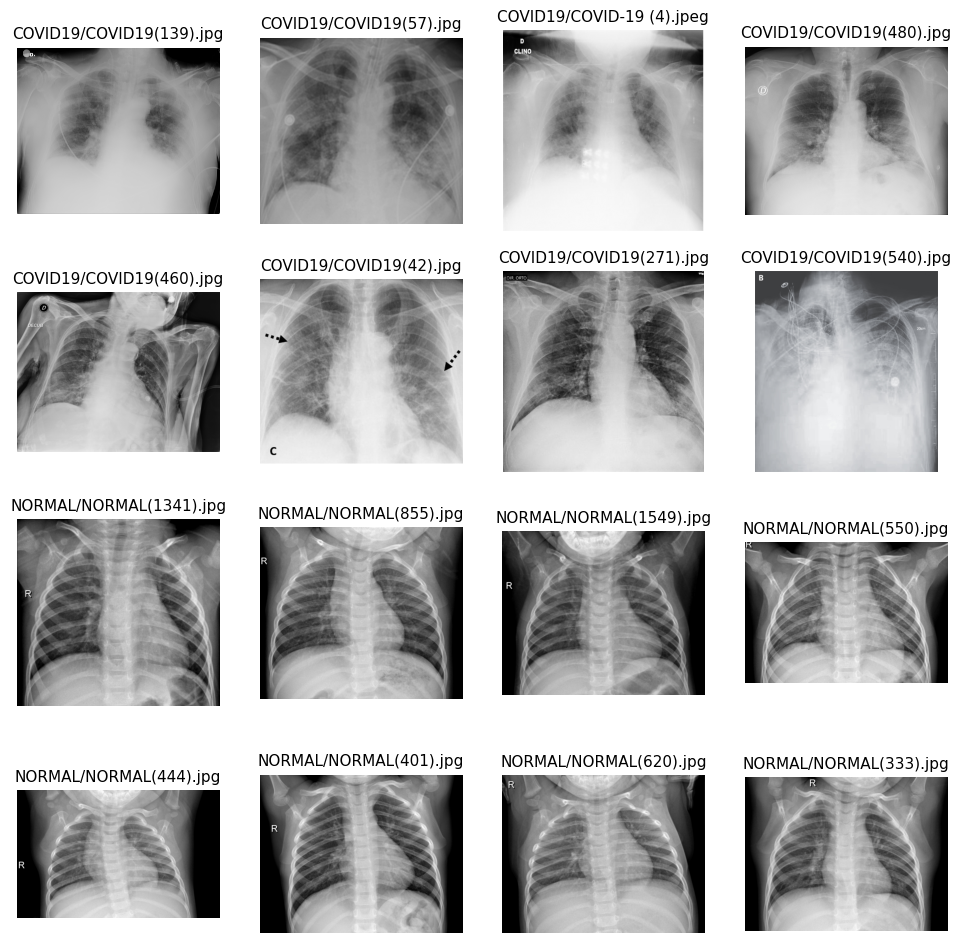

In [39]:
import matplotlib.image as mpimg
rows = 4
columns = 4
fig = plt.gcf()
fig.set_size_inches(12,12)
covid_img = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_img = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]
print(covid_img)
print(normal_img)
merged_img = covid_img + normal_img
for i, img_path in enumerate(merged_img):
  title = img_path.split("/", 6)[6]
  plot = plt.subplot(rows, columns, i+1)
  plot.axis("Off")
  img = mpimg.imread(img_path)
  plot.set_title(title, fontsize = 11)
  plt.imshow(img, cmap= "gray")

plt.show()

In [45]:
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)
dgen_validation = ImageDataGenerator(rescale = 1./255,
                                     )
dgen_test = ImageDataGenerator(rescale = 1./255,
                              )
train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size = (150, 150),
                                                      subset = "validation",
                                                      batch_size = 32,
                                                      class_mode = "binary")
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size = (150, 150),
                                               batch_size = 32,
                                               class_mode = "binary")


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [47]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is : ", train_generator.image_shape)

Class Labels are:  {'COVID19': 0, 'NORMAL': 1}
Image shape is :  (150, 150, 3)


In [60]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
model = Sequential()
# 1) CONVOLUTIONAL LAYER - 1
model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape))
# 2) POOLING LAYER - 1
model.add(MaxPooling2D(pool_size=(2,2)))
# 3) DROPOUT LAYER -2
model.add(Dropout(0.5))

# 4) CONVOLUTIONAL LAYER - 2
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))
# 5) POOLING LAYER - 2
model.add(MaxPooling2D(pool_size=(2,2)))
# 6) DROPOUT LAYER - 2
model.add(Dropout(0.5))
# 7) FLATTENING LAYER TO 2D SHAPE
model.add(Flatten())
#  8) ADDING A DENSE LAYER
model.add(Dense(256, activation = 'relu'))
# 9 DROPOUT LAYER - 3
model.add(Dropout(0.5))
# 10) FINAL OUTPUT LAYER
model.add(Dense(1, activation = 'sigmoid'))
### PRINTING MODEL SUMMARY
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 150, 150, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 75, 75, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 87616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    22,429,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,483,905 (85.77 MB)

 Trainable params: 22,483,905 (85.77 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [62]:
history = model.fit(train_generator,
                    epochs = 35,
                    validation_data = validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.6339 - loss: 2.1065 - val_accuracy: 0.8481 - val_loss: 0.3776
Epoch 2/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - accuracy: 0.8811 - loss: 0.3100 - val_accuracy: 0.9254 - val_loss: 0.2598
Epoch 3/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 209s 4s/step - accuracy: 0.9151 - loss: 0.2509 - val_accuracy: 0.9144 - val_loss: 0.2709
Epoch 4/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - accuracy: 0.9402 - loss: 0.1664 - val_accuracy: 0.9530 - val_loss: 0.1434
Epoch 5/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.9188 - loss: 0.2375 - val_accuracy: 0.9669 - val_loss: 0.1471
Epoch 6/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.9528 - loss: 0.1511 - val_accuracy: 0.9503 - val_loss: 0.1576
Epoch 7/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 161s 4s/step - accuracy: 0.9404 - loss: 0.1489 - val_accuracy: 0.9558 - val_loss: 0.1175
Epoch 8/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.9634 - loss: 0.1165 - val_accuracy: 0.9282 - v

In [63]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 0, 'epoch')

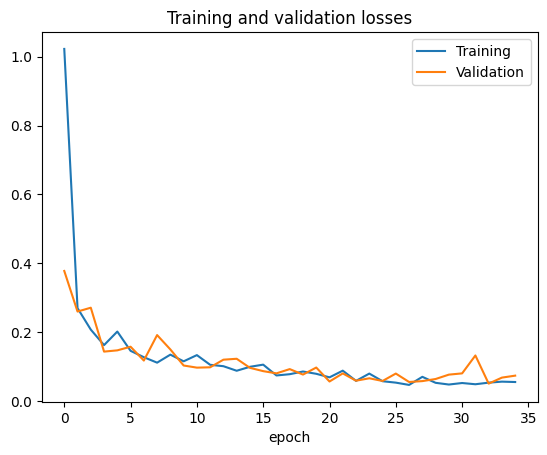

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

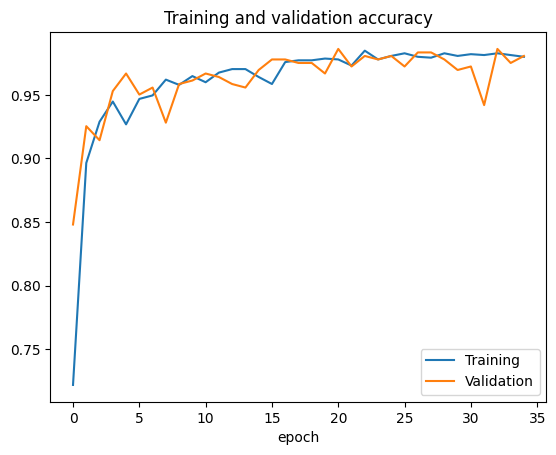

In [73]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [75]:
# GETTING TEST ACCURACY AND LOSS

test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9802 - loss: 0.0569
Test Set Loss :  0.06275717169046402
Test Set Accuracy :  0.9814049601554871


In [82]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/' + filename
  img = image.load_img(img_path, target_size = (150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis = 0)
  prediction = model.predict(images)

  if prediction == 0:
    print("The report is COVID-19 Positive")
  else:
    print("The report is COVID-19 Negative")

Saving COVID19(554).jpg to COVID19(554) (4).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
The report is COVID-19 Positive
